# Machine Learning Engineer Nanodegree
## Capstone Project - Allstate Claim Loss Prediction


Before my enrollment on the Machine Learning Nanodegree Program I had an Idea of what Supervised Learning was, but now after seen all the scope of what this course offers me, I have a very clear understanding of what to do to solve multiple problems and situations.

Supervised machine learning is the search for algorithms that reason from externally supplied instances to produce general hypotheses, which then make predictions about future instances. In other words, the goal of supervised learning is to build a concise model of the distribution of class labels in terms of predictor features. The resulting classifier is then used to assign class labels to the testing instances where the values of the predictor features are known, but the value of the class label is unknown.

In this Capstone Project, I had the option to select a topic in Kaggle, so found a competition that I think suits my needs for this project, is the “Allstate Claims Severity Challenge”: Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this challenge, Allstate enforce you to show off your creativity by creating an algorithm which accurately predicts claims severity.

## Data Exploration

In this section, we will explore and analyze the data used for the problem. The data is provided in (https://www.kaggle.com/c/allstate-claims-severity/data).

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
train = pd.read_csv('data/train.csv')
train_id = train['id']
train.drop(['id'], axis = 1, inplace=True)
#train_y = train['loss']
train_x = train.drop(['loss'], axis = 1)

#train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, random_state=0)


#test = pd.read_csv('data/test.csv')
#test_id = test['id']
#test_x = test.drop(['id'], axis = 1)
    
# Success
print("Allstate Claim train dataset has {} data points with {} variables each.".format(*train.shape))
#print("Allstate Claim test dataset has {} data points with {} variables each.".format(*test.shape))
print("\n\n")
print(train.head(5))

Allstate Claim train dataset has 188318 data points with 131 variables each.



  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10   ...        cont6  \
0    A    B    A    B    A    A    A    A    B     A   ...     0.718367   
1    A    B    A    A    A    A    A    A    B     B   ...     0.438917   
2    A    B    A    A    B    A    A    A    B     B   ...     0.289648   
3    B    B    A    B    A    A    A    A    B     A   ...     0.440945   
4    A    B    A    B    A    A    A    A    B     B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  

### Data Statistics
Now that we have loaded the data, we are going to see the stats from the train dataset.

In [9]:
print("Data Statistics")
print(train.describe())

Data Statistics
               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281

From the above info we can see that the continuous values are already normalized. Also, we can notice that there is no missing values from the continues values as all columns have 188318 as count.

### Analysis of Skewed features

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64





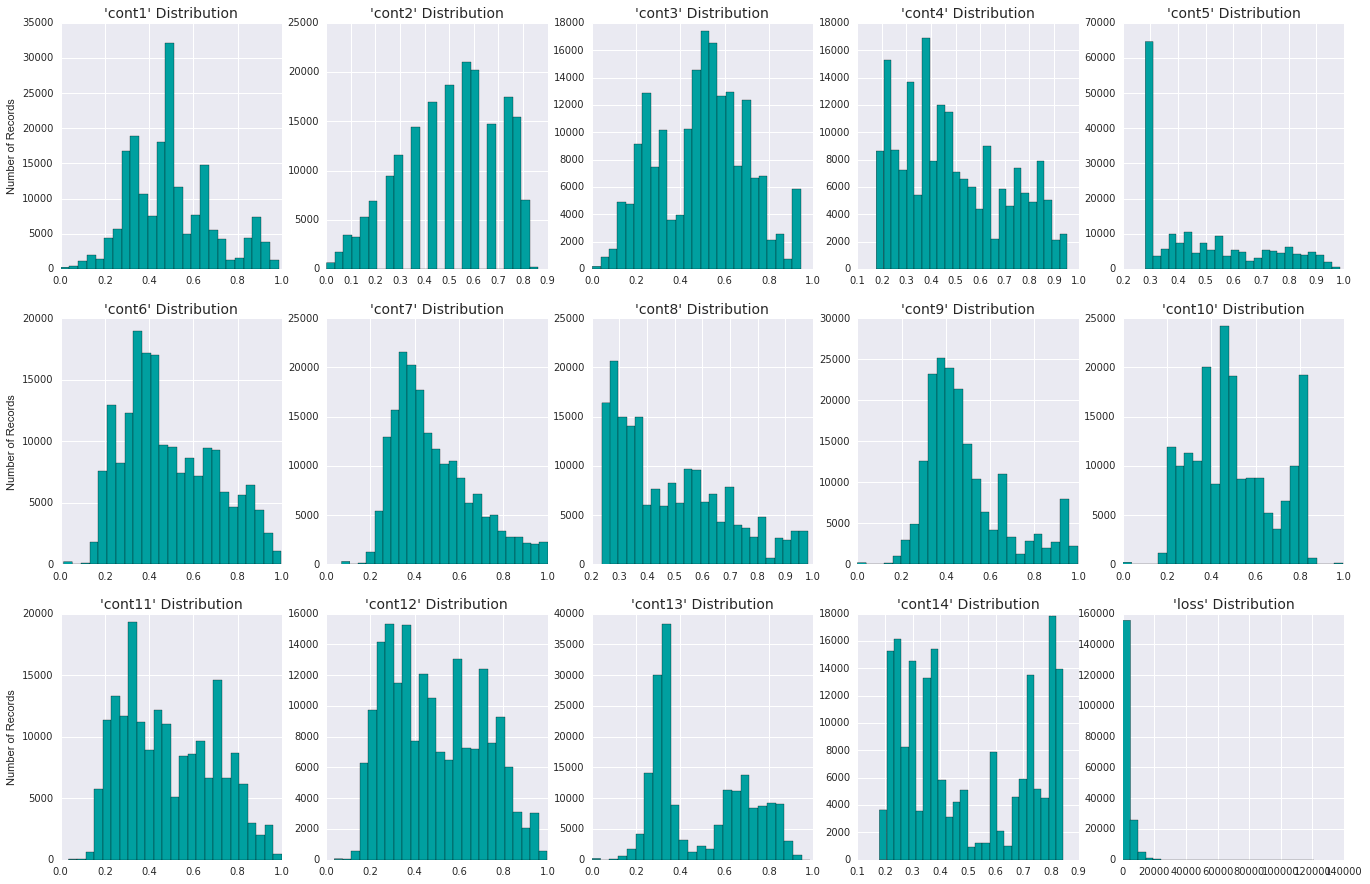

In [10]:
import matplotlib.pyplot as plt

print(train.skew())
print("\n\n")

# Create figure
fig = plt.figure(figsize = (23,15));

# Skewed feature plotting
for i, feature in enumerate(train.columns[116:]):
    ax = fig.add_subplot(3, 5, i+1)
    ax.hist(train[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Distribution"%(feature), fontsize = 14)
    #ax.set_xlabel("Value")
    if(i in [0,5,10]):
        ax.set_ylabel("Number of Records")

### Data Correlation

Now we need to find out if there is any correlated feature and which features are to be able to delete those feature and reduce the dimentionality of the data using PCA and SelectKBest.

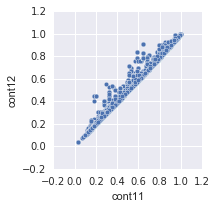

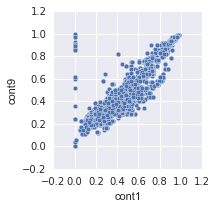

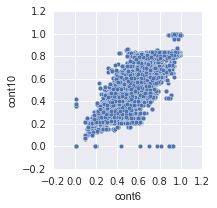

In [11]:
import seaborn as sns

data_corr = train_x.corr()

threshold = 0.5

corr_list = []

#Search for the highly correlated pairs
for i in range(0,14): 
    for j in range(i+1,14):
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list[:3]:
    sns.pairplot(train_x.iloc[:,116:], size=3, x_vars=train_x.columns[116:][i],y_vars=train_x.columns[116:][j])
#    plt.show()

## Data Preprocessing

### Data Transformation of Skewed Continuous values

As we can see in the above graphics the loss values are skewed so in order to improve the results of the learning algorithms we will transform this field. We will apply a logarithmic transformation to the Loss values, so that the very large and very small values do not negatively affect the performance of the learning algorithms. 

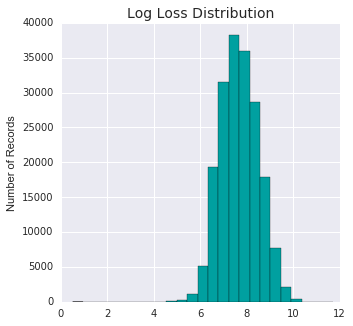

In [12]:
log_y = train['loss'].apply(lambda x: np.log(x + 1))
# Create figure
fig = plt.figure(figsize = (5,5));

# log loss plotting
ax = fig.add_subplot(111)
ax.hist(log_y, bins = 25, color = '#00A0A0')
ax.set_title("Log Loss Distribution", fontsize = 14)
#ax.set_xlabel("Value")
ax.set_ylabel("Number of Records")

### Categorical features transformation

We are going to transform the values for our categorical features using OneHotEncoder, this way all the categories are going to be flattened to have binary features instead of several categories.

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#le_cat_train  =train_x.iloc[:,:116].apply(LabelEncoder().fit_transform)
#print(le_cat_train.shape)

#ohe = OneHotEncoder()
#encoded_cat_train = ohe.fit_transform(le_cat_train)
#encoded_cat_train = le_cat_train.apply(OneHotEncoder().fit_transform)

#print(encoded_cat_train.shape)
#print(encoded_cat_train.type)

#encoded_train = pd.concat(pd.DataFrame(data=encoded_cat_train, columns=[lambda x: "cat"+x for x in range(1,117)]), train_x.iloc[:,116:])
le_cat_train = []
for ii in range(0,116):
    le = LabelEncoder()
    le.fit(train.iloc[:,ii])
    le_feature = le.transform(train.iloc[:,ii]).reshape(train.shape[0], 1)
    ohe = OneHotEncoder(sparse=False)
    le_feature = ohe.fit_transform(le_feature)
    le_cat_train.append(le_feature)

encoded_cat_train = np.column_stack(le_cat_train)

encoded_train = np.concatenate((encoded_cat_train, train_x.iloc[:,116:].values),axis=1)

print(encoded_cat_train.shape)
print(encoded_train.shape)

(188318L, 1139L)
(188318L, 1153L)


### Dimentionality Reduction Algorithm

Now that we have seen the correlational features in the above plots, we can be sure that we need to reduce the dimentionality of features in the data. We are going to use PCA over our data. 

First lets plot the PCA spectrum to see the explained variance over the data. 

In [14]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(encoded_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

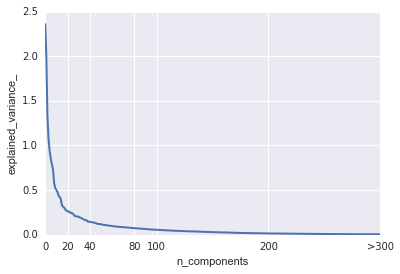

In [15]:
plt.figure(1, figsize=(10, 3))
plt.clf()
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_, linewidth=2)
#ax.axis('tight')
ax.set_xlabel('n_components')
ax.set_ylabel('explained_variance_')
ax.set_xlim((0, 300))
ax.set_xticks([0, 20, 40, 80, 100, 200, 300])
ax.set_xticklabels([0, 20, 40, 80, 100, 200, ">300"])

From the above image we can see that most of variance is explained in the first 100 components of the data. So We can now use PCA in our dataset.

In [16]:
pca = PCA(n_components=100)

reduced_train = pca.fit_transform(encoded_train)

print(reduced_train.shape)

(188318L, 100L)


### Training and testing data split

In [49]:
from sklearn.model_selection import train_test_split

def split(x, y):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.30, random_state=0)

    print("x_train shape: {} and y_train shape: {}".format(x_train.shape,y_train.shape))
    print("x_valid shape: {} and y_valid shape: {}".format(x_valid.shape,y_valid.shape))
    return (x_train, x_valid, y_train, y_valid)
    
x_train, x_valid, y_train, y_valid = split(reduced_train, log_y)

x_train shape: (131822L, 100L) and y_train shape: (131822L,)
x_valid shape: (56496L, 100L) and y_valid shape: (56496L,)


## Implementation

### Naive training of the selected algorithms

Now we are going to train and execute the algorithms selected using just a few parameters and without optimization to compare them and select the model we will further optimize in the next section.

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from time import time

train_20_perc = int(x_train.shape[0]*0.2)
valid_20_perc = int(x_valid.shape[0]*0.2)

clf = AdaBoostRegressor()
start_fit = time()
clf.fit(x_train[:train_20_perc], y_train[:train_20_perc])
end_fit = time()
start_pred = time()
y_pred = clf.predict(x_valid)
end_pred = time()

print("MSE: {}".format(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred))))
print("fitting time: {}".format(end_fit - start_fit))
print("prediction time: {}".format(end_pred - start_pred))

#scores = cross_val_score(svr, x_train, y_train, scoring='mean_squared_error')

#print(scores)

MSE: 6693632.24393
fitting time: 23.5080001354
prediction time: 0.450999975204


In [23]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor()
start_fit = time()
clf.fit(x_train[:train_20_perc], y_train[:train_20_perc])
end_fit = time()
start_pred = time()
y_pred = clf.predict(x_valid)
end_pred = time()

print("MSE: {}".format(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred))))
print("fitting time: {}".format(end_fit - start_fit))
print("prediction time: {}".format(end_pred - start_pred))

MSE: 5778697.43914
fitting time: 0.0840001106262
prediction time: 0.0169999599457


In [24]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor()
start_fit = time()
clf.fit(x_train[:train_20_perc], y_train[:train_20_perc])
end_fit = time()
start_pred = time()
y_pred = clf.predict(x_valid)
end_pred = time()

print("MSE: {}".format(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred))))
print("fitting time: {}".format(end_fit - start_fit))
print("prediction time: {}".format(end_pred - start_pred))

MSE: 5965773.05184
fitting time: 0.241000175476
prediction time: 444.65899992


In [25]:
from sklearn.svm import SVR

clf = SVR(kernel='linear')
start_fit = time()
clf.fit(x_train[:train_20_perc], y_train[:train_20_perc])
end_fit = time()
start_pred = time()
y_pred = clf.predict(x_valid)
end_pred = time()

print("MSE: {}".format(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred))))
print("fitting time: {}".format(end_fit - start_fit))
print("prediction time: {}".format(end_pred - start_pred))

MSE: 6083148.45416
fitting time: 405.055999994
prediction time: 110.030999899


## Refinement

The model we will refine is Stochastic Gradient Descent. For this we will use GridSearchCV to find the best parameters to tune this model.

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def run_clf():
    scorer = make_scorer(mean_squared_error, greater_is_better=False)

    sgd = SGDRegressor()
    params={'n_iter':[5, 10, 20, 40, 60, 100, 120], 'average':[False,True]}
    clf = GridSearchCV(estimator=sgd, param_grid=params, scoring=scorer)

    start_fit = time()
    clf.fit(x_train, y_train)
    end_fit = time()

    #print("Fit best score: {}".format(clf.best_score_))
    print(clf.best_estimator_)

    start_pred = time()
    y_pred = clf.predict(x_valid)
    end_pred = time()
    print("fitting time: {}".format(end_fit - start_fit))
    print("prediction time: {}".format(end_pred - start_pred))
    return y_pred

y_pred = run_clf()
print("MSE from original values: {}".format(mean_squared_error(np.expm1(y_valid), np.expm1(y_pred))))

SGDRegressor(alpha=0.0001, average=True, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=120, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
fitting time: 119.440999985
prediction time: 0.0119998455048
MSE from original values: 5720230.02465


From the previous execution of the model we can see that we improved the result we get on the naive execution. We pass from a MSE of 5777346.0931 to 5591999.00906 using the normalized values of loss.

Now we are going to see what happen if we don't transform the target values and don't reduce the dimensionality.

In [36]:
x_train, x_valid, y_train, y_valid = split(reduced_train, train['loss'])

x_train shape: (131822L, 100L) and y_train shape: (131822L,)
x_valid shape: (56496L, 100L) and y_valid shape: (56496L,)


In [37]:
y_pred = run_clf()
print("MSE original values without log: {}".format(mean_squared_error(y_valid, y_pred)))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
fitting time: 109.904000044
prediction time: 0.00999999046326
MSE original values without log: 4321112.83375


Well it seems that my hypothesis was wrong about transforming the target data. It had a better result when we use the raw target data. Now we are going to try without transformed target nor reduced dimensionality features.

In [39]:
x_train, x_valid, y_train, y_valid = split(encoded_train, train['loss'])

x_train shape: (131822L, 1153L) and y_train shape: (131822L,)
x_valid shape: (56496L, 1153L) and y_valid shape: (56496L,)


In [40]:
clf = run_clf()
print("MSE original values without log nor reduced dimensionality: {}".format(mean_squared_error(y_valid, y_pred)))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
fitting time: 691.588999987
prediction time: 0.445999860764
MSE original values without log nor reduced dimensionality: 4321112.83375


## Results

We achieved an MSE of 4082608.64216 using the SGDRegressor with the original values for target. This result is better than the one produced by the SVR model without optimization (5971154.43957) by a few hundreds. So my hypothesis of data transformation of the target value wasn't good for this case. The PCA in this case wasn't good enough because the algorithm SGD has a very good time performance and it is able to manage that amount of features, but It was too much faster with the data with reduced dimensionality.

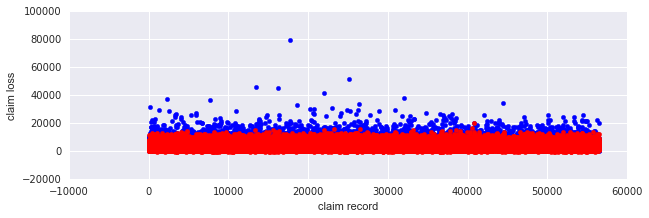

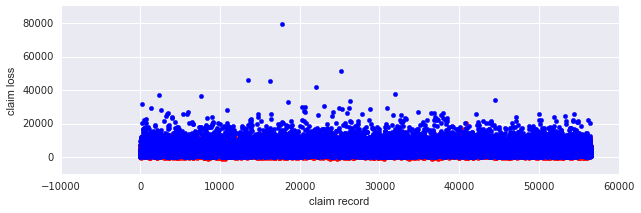

In [44]:
x1 = [x for x in range(0, y_pred.shape[0])]

plt.figure(1, figsize=(10, 3))
plt.clf()
plt.scatter(x1, y_valid, color='blue')
plt.scatter(x1, y_pred, color='red')
plt.xlabel('claim record')
plt.ylabel('claim loss')
plt.show()
plt.figure(2, figsize=(10, 3))
plt.scatter(x1, y_pred, color='red')
plt.scatter(x1, y_valid, color='blue')
plt.xlabel('claim record')
plt.ylabel('claim loss')
plt.show()

### Robustness

To measure the algorithm robustness we are going to use cross_val_score technique to see the performance variance based on data perturbations.

In [47]:
from sklearn.model_selection import cross_val_score

scorer = make_scorer(mean_squared_error, greater_is_better=False)

sgd = SGDRegressor(n_iter=60)
print(cross_val_score(sgd,x_train,y_train, scoring=scorer))


[ 4716570.46130768  4182057.34187917  4033495.87649668]
